In [ ]:
!pip install numpy
!pip install matplotlib
!pip install sounddevice
!pip install scipy

In [3]:
import numpy as np
import matplotlib.pyplot as plt

1) Розовый шум

In [7]:
duration = 5  # Продолжительность в секундах
sample_rate = 44100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate)

In [20]:
# генерим белый шум
white_noise = np.random.normal(loc = 0, scale = 1, size = num_samples)

# генерим розовый шум
fft = np.fft.rfft(white_noise)
freqs = np.fft.rfftfreq(num_samples, d=1/sample_rate)
amps = np.abs(fft)
coefs = np.zeros(freqs.shape)
coefs[1:] = 1 / np.sqrt(freqs[1:])
pink_amps = amps * coefs
pink_fft = pink_amps * np.exp(1j * np.angle(fft))
pink_noise = np.real(np.fft.irfft(pink_fft))

print(pink_noise)


[ 0.00479506  0.00602403 -0.00275809 ...  0.0101125  -0.01501576
 -0.00748176]


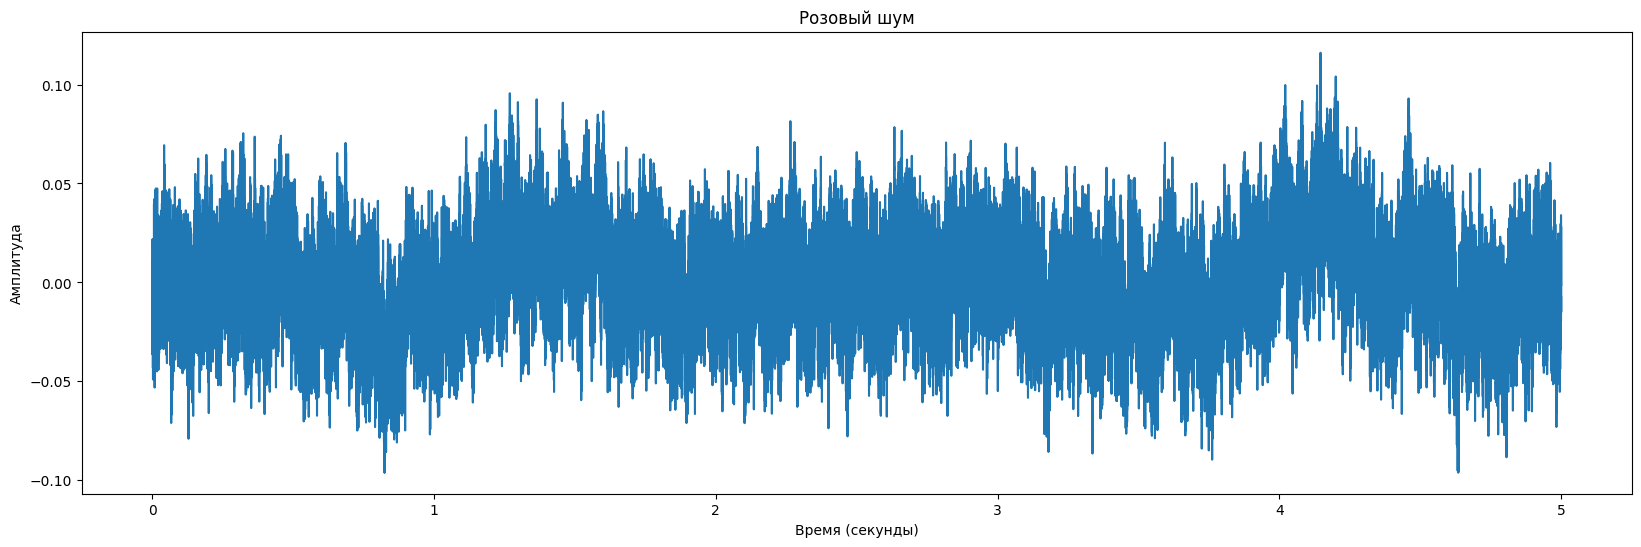

In [21]:
# отрисовываем, что получилось 
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

2) Черный шум

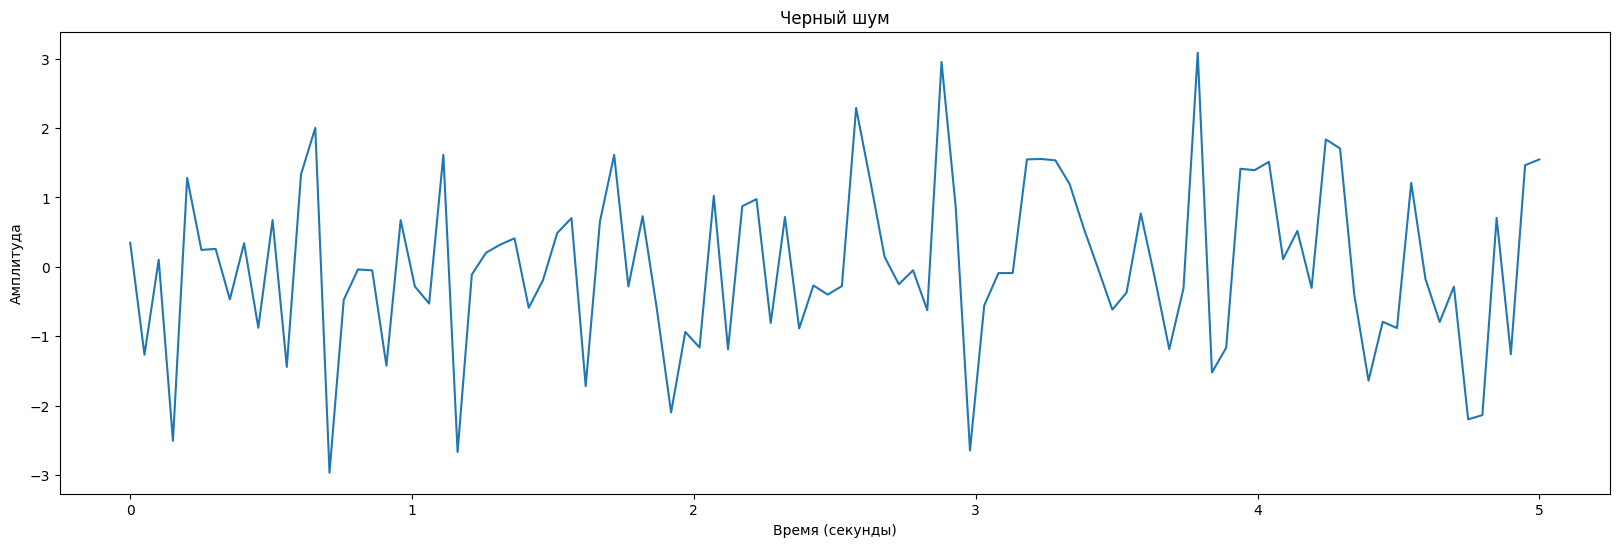

In [22]:
# количество элементов в записи сигнала
num_samples = int(duration * sample_rate)
freq1 = 20000
freq2 = 25000

# Частоты, на которых будем генерировать
num_frequencies = 100  # Количество случайных частот
frequencies = np.linspace(freq1, freq2, num_frequencies) # лист с частотами

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось

amplitudes = np.random.normal(0, 1, num_frequencies)  # опять сгенерировали белый гауссовский шум
    
black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
    
for i in range(num_frequencies):
        black_noise += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * time_axis)
    

# Визуализация
time_axis = np.linspace(0, duration, len(amplitudes))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, amplitudes)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()